In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Initialiserer pen visning av uttrykkene
sp.init_printing()

# Plotteparametre for å få store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

# Helmholtzspoler

## Usikkerhet

In [2]:
# Definerer variablene som inngår i uttrykkene for Biot-Savarts lov for alle geometriene
mu0, I, R, N, l, x, z, a = sp.symbols('mu0 I R N l x z a')

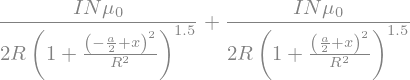

In [3]:
helmholtz = (N*mu0*I)/(2*R) * (1 + (x - a/2)**2/R**2)**(-3/2) + (N*mu0*I)/(2*R) * (1 + (x + a/2)**2/R**2)**(-3/2)
helmholtz

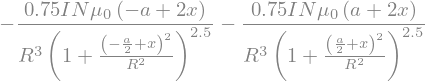

In [4]:
partial_difs = [sp.diff(helmholtz, x), sp.diff(helmholtz, R), sp.diff(helmholtz, a)]
partial_difs[0]

In [5]:
# load data funksjon
def get_data(file_path):
    data =np.loadtxt(file_path, delimiter=',', encoding="utf-8-sig", skiprows=1)
    x =data[:, 0]   #posisjon,sentrertrundtx0
    y =data[:, 1]      #m˚aledata
    return x, y

# last inn data fra forskjellige målinger
x1, y1 = get_data("data/helmholtzspoler/2R.csv")
x2, y2 = get_data("data/helmholtzspoler/R_2.csv")
x3, y3 = get_data("data/helmholtzspoler/R.csv")

In [29]:
xb =np.linspace(-0.2, .2, 100)

# Regn ut beregnet magnetfelt i de 3 forskjellige distansene
Bb = []
for a_val in [0.14, 0.035, 0.07]:
    curr = np.array([helmholtz.subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi), (a, a_val)])*1e4
            for xbi in xb]).astype(np.float64)
    Bb.append(curr)
Bb = np.array(Bb)

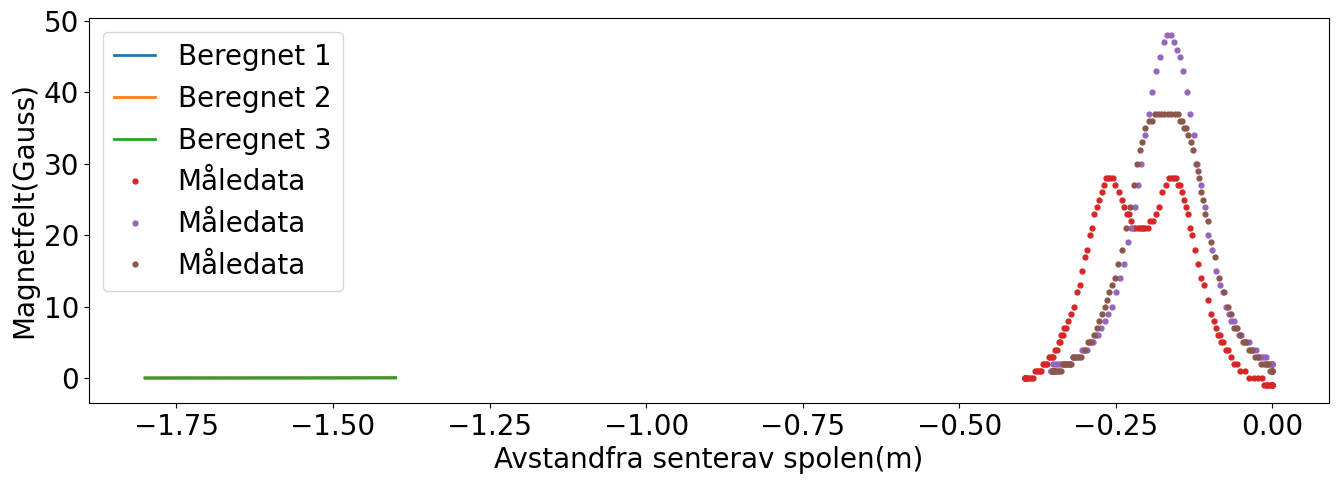

In [32]:
offset = -0.6
plt.plot(xb-0.6,Bb[0], label='Beregnet 1')
plt.plot(xb -,Bb[1], label='Beregnet 2')
plt.plot(xb -,Bb[2], label='Beregnet 3')
plt.plot(x1,y1, '.',label='Måledata')
plt.plot(x2,y2, '.',label='Måledata')
plt.plot(x3,y3, '.',label='Måledata')
plt.xlabel('Avstandfra senterav spolen(m)')
plt.ylabel('Magnetfelt(Gauss)')
plt.legend()
plt.show()